In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import copy

In [81]:
df = pd.read_csv('Data/booking.csv')
df.head()

pd.set_option('display.max_columns', None)

In [82]:
# change target variable to 0s and 1s to ease classification

df['booking status'] = df['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})

df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,0
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,0
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,1
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,1
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,1


In [83]:
# check for duplicated or null values

df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [201]:
X = df.copy()
y = df['booking status']

X.drop(columns = ['booking status'], inplace = True)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

new_X_train.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation
31860,INN31861,1,0,2,1,Meal Plan 1,0,Room_Type 1,11,Online,0,0,0,62.37,1,12/13/2017
1141,INN01142,2,0,2,1,Meal Plan 2,0,Room_Type 1,122,Offline,0,0,0,107.00,1,3/27/2018
246,INN00247,2,0,0,3,Meal Plan 1,1,Room_Type 1,78,Online,0,0,0,105.30,1,3/24/2018
26640,INN26641,2,0,0,2,Meal Plan 1,0,Room_Type 6,132,Online,0,0,0,153.00,2,11/25/2018
5783,INN05784,2,0,0,1,Meal Plan 1,0,Room_Type 1,16,Corporate,0,0,0,75.00,0,3/11/2018


In [234]:
trainRatio = round((new_y_train.sum()/len(new_y_train))*100,2)
testRatio = round((new_y_test.sum()/len(new_y_test)*100),2)

print(f'Train positive class ratio: {trainRatio}%')
print(f'Test positive class ratio: {testRatio}%')

Train positive class ratio: 32.76%
Test positive class ratio: 32.77%


In [206]:
# concatenate the X and y training sets for EDA purposes
eda_test_data = copy.deepcopy(new_X_train)
eda_test_data['bookingStatus'] = new_y_train

In [207]:
# create a correlation matrix for each of the features to the target variable

eda_test_data.corr(numeric_only = True).sort_values(by = 'bookingStatus', ascending = False)

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,bookingStatus
bookingStatus,0.088858,0.031277,0.065313,0.096170,-0.086400,0.436689,-0.110267,-0.037245,-0.061808,0.141669,-0.250350,1.000000
lead time,0.096956,-0.047598,0.047117,0.152326,-0.063656,1.000000,-0.139162,-0.048648,-0.079968,-0.062206,-0.099387,0.436689
average price,0.304026,0.340637,-0.001873,0.024398,0.057687,-0.062206,-0.177700,-0.064022,-0.117911,1.000000,0.183386,0.141669
number of week nights,0.106009,0.024188,0.174714,1.000000,-0.052846,0.152326,-0.100972,-0.028606,-0.048822,0.024398,0.046218,0.096170
number of adults,1.000000,-0.019029,0.105271,0.106009,0.008764,0.096956,-0.198917,-0.049206,-0.121398,0.304026,0.187338,0.088858
number of weekend nights,0.105271,0.027552,1.000000,0.174714,-0.032609,0.047117,-0.072671,-0.023714,-0.028980,-0.001873,0.062763,0.065313
number of children,-0.019029,1.000000,0.027552,0.024188,0.035288,-0.047598,-0.036537,-0.016598,-0.021658,0.340637,0.129250,0.031277
P-C,-0.049206,-0.016598,-0.023714,-0.028606,0.020877,-0.048648,0.387050,1.000000,0.479840,-0.064022,0.000651,-0.037245
P-not-C,-0.121398,-0.021658,-0.028980,-0.048822,0.066868,-0.079968,0.542522,0.479840,1.000000,-0.117911,0.033501,-0.061808
car parking space,0.008764,0.035288,-0.032609,-0.052846,1.000000,-0.063656,0.116417,0.020877,0.066868,0.057687,0.088439,-0.086400


<Axes: >

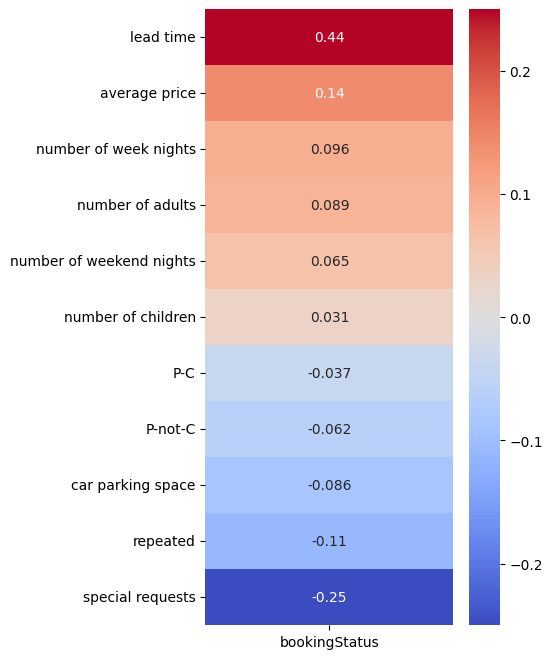

In [208]:
corrMatrix = eda_test_data.corr(numeric_only = True).sort_values(by = 'bookingStatus', ascending = False)

fig, ax = plt.subplots(figsize = (4, 8))

corrMatrixWithoutStatus = corrMatrix.drop('bookingStatus')

sns.heatmap(corrMatrixWithoutStatus[['bookingStatus']], annot = True, cmap = 'coolwarm', vmax = 0.25, vmin = -0.25)


In [209]:
# look into any missing values (if there exists any)

new_X_train.isnull().sum().sum()

np.int64(0)

In [210]:
# check for missing values in the training set

new_X_train.isnull().sum()
new_X_train.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation
31860,INN31861,1,0,2,1,Meal Plan 1,0,Room_Type 1,11,Online,0,0,0,62.37,1,12/13/2017
1141,INN01142,2,0,2,1,Meal Plan 2,0,Room_Type 1,122,Offline,0,0,0,107.00,1,3/27/2018
246,INN00247,2,0,0,3,Meal Plan 1,1,Room_Type 1,78,Online,0,0,0,105.30,1,3/24/2018
26640,INN26641,2,0,0,2,Meal Plan 1,0,Room_Type 6,132,Online,0,0,0,153.00,2,11/25/2018
5783,INN05784,2,0,0,1,Meal Plan 1,0,Room_Type 1,16,Corporate,0,0,0,75.00,0,3/11/2018


In [235]:
# use a simple imputer to fill in the missing values

simple_imputer = SimpleImputer(strategy = 'most_frequent')

X_train_imputed = simple_imputer.fit_transform(new_X_train)
X_test_imputed = simple_imputer.fit_transform(new_X_test)

X_train_imputed_df = pd.DataFrame(X_train_imputed, columns = new_X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns = new_X_test.columns)

X_test_imputed_df.head()



,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation
0,INN23922,2,0,1,3,Meal Plan 1,0,Room_Type 4,23,Online,0,0,0,140.9,0,6/2/2018
1,INN36168,2,0,1,4,Meal Plan 1,0,Room_Type 1,18,Online,0,0,0,94.4,1,6/13/2018
2,INN10484,2,0,1,1,Meal Plan 1,0,Room_Type 1,35,Online,0,0,0,200.0,1,9/26/2017
3,INN26624,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,Corporate,0,0,0,185.0,0,9/19/2018
4,INN12178,2,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,147.67,1,7/9/2018


In [236]:
# Must encode all categorical features that are present in the data, not just the target variable

cat_cols_one_hot = ['type of meal', 'room type', 'market segment type']

new_one_hot_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

one_hot_encoded = new_one_hot_encoder.fit_transform(X_train_imputed_df[cat_cols_one_hot])
one_hot_encoded_test = new_one_hot_encoder.transform(X_test_imputed_df[cat_cols_one_hot])

In [237]:
one_hot_encoded_features = new_one_hot_encoder.get_feature_names_out()
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoded_features, index=X_train_imputed_df.index)

one_hot_df_test = pd.DataFrame(one_hot_encoded_test, columns=one_hot_encoded_features, index=X_test_imputed_df.index)

X_train_no_cat = X_train_imputed_df.drop(columns= cat_cols_one_hot)
X_test_no_cat = X_test_imputed_df.drop(columns= cat_cols_one_hot)

# Concatenate the encoded categorical features back
X_train_final = pd.concat([X_train_no_cat, one_hot_df], axis=1)
X_test_final = pd.concat([X_test_no_cat, one_hot_df_test], axis=1)
X_test_final.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,date of reservation,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,INN23922,2,0,1,3,0,23,0,0,0,140.9,0,6/2/2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,INN36168,2,0,1,4,0,18,0,0,0,94.4,1,6/13/2018,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,INN10484,2,0,1,1,0,35,0,0,0,200.0,1,9/26/2017,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,INN26624,1,0,1,1,0,0,0,0,0,185.0,0,9/19/2018,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,INN12178,2,0,2,1,0,1,0,0,0,147.67,1,7/9/2018,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [238]:
X_train_final.drop(columns = ['date of reservation'], inplace = True)
X_test_final.drop(columns = ['date of reservation'], inplace = True)
X_test_final.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,INN23922,2,0,1,3,0,23,0,0,0,140.9,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,INN36168,2,0,1,4,0,18,0,0,0,94.4,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,INN10484,2,0,1,1,0,35,0,0,0,200.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,INN26624,1,0,1,1,0,0,0,0,0,185.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,INN12178,2,0,2,1,0,1,0,0,0,147.67,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [228]:
# do a little bit of research into the dummy variable trap and whether our dataset suffers from it as a result of one-hot encoding

# first, convert all columns to ints or floats as they are currently in object format
for col in X_train_final.columns[:17]:
    X_train_final[col] = pd.to_numeric(X_train_final[col], errors='coerce')

for col in X_train_final.columns[:17]:
    non_numeric = X_train_final[~X_train_final[col].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"Issues in column {col}:")
        print(non_numeric)

def calculate_vif(dataframe):
    df_with_constant = add_constant(dataframe)

    vif_data = pd.DataFrame()
    vif_data['Feature'] = df_with_constant.columns
    vif_data['VIF'] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]

    return vif_data

vif_df = calculate_vif(X_train_final)
vif_df


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,const,0.000000
1,number of adults,1.343483
2,number of children,2.040940
3,number of weekend nights,1.065109
4,number of week nights,1.095308
5,car parking space,1.037799
6,lead time,1.213903
7,repeated,1.779614
8,P-C,1.361021
9,P-not-C,1.640292


In [ ]:
# clear presence of the dummy variable trap, so we will remove some of the one-hot encoded features, also drop the column with target variable

X_train_final = X_train_final.drop(columns=['room type_Room_Type 1', 'type of meal_Meal Plan 1', 'market segment type_Aviation'])



,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,0,2,1,0,11,0,0,0,62.37,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,2,1,0,122,0,0,0,107.00,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0,0,3,1,78,0,0,0,105.30,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,0,0,2,0,132,0,0,0,153.00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2,0,0,1,0,16,0,0,0,75.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [232]:
vif_df = calculate_vif(X_train_final)
vif_df

,Feature,VIF
0,const,311.308765
1,number of adults,1.343483
2,number of children,2.040940
3,number of weekend nights,1.065109
4,number of week nights,1.095308
5,car parking space,1.037799
6,lead time,1.213903
7,repeated,1.779614
8,P-C,1.361021
9,P-not-C,1.640292


In [242]:
# perform the same mitigation measures for the test set

X_test_final.drop(columns = ['Booking_ID'], inplace = True)

for col in X_test_final.columns[:17]:
    X_test_final[col] = pd.to_numeric(X_test_final[col], errors='coerce')

for col in X_test_final.columns[:17]:
    non_numeric = X_test_final[~X_test_final[col].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"Issues in column {col}:")
        print(non_numeric)

vif_df = calculate_vif(X_test_final)

vif_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,const,0.000000
1,number of adults,1.314491
2,number of children,1.842431
3,number of weekend nights,1.072604
4,number of week nights,1.101677
5,car parking space,1.029978
6,lead time,1.224913
7,repeated,1.695313
8,P-C,1.351523
9,P-not-C,1.526439


In [247]:
# X_test_final.drop(columns = ["type of meal_Meal Plan 1", "room type_Room_Type 1", "market segment type_Aviation"], inplace = True)
vif_df = calculate_vif(X_test_final)

vif_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,const,324.640915
1,number of adults,1.314491
2,number of children,1.842431
3,number of weekend nights,1.072604
4,number of week nights,1.101677
5,car parking space,1.029978
6,lead time,1.224913
7,repeated,1.695313
8,P-C,1.351523
9,P-not-C,1.526439


In [233]:
# dummy trap has been mitigated against, now let's train the model

rf = RandomForestClassifier()

rf.fit(X_train_final, new_y_train)

RandomForestClassifier()

In [248]:
y_pred = rf.predict(X_test_final)

In [249]:
accuracy = accuracy_score(new_y_test, y_pred)
print(accuracy)

0.8881080336227091


In [251]:
print("Confusion Matrix: ")
print(confusion_matrix(new_y_test, y_pred))

print("Classification Report: ")
print(classification_report(new_y_test, y_pred, digits = 4))

y_proba = rf.predict_proba(X_test_final)[:,1]
roc_auc = roc_auc_score(new_y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

Confusion Matrix: 
[[4565  314]
 [ 498 1880]]
Classification Report: 
              precision    recall  f1-score   support

           0     0.9016    0.9356    0.9183      4879
           1     0.8569    0.7906    0.8224      2378

    accuracy                         0.8881      7257
   macro avg     0.8793    0.8631    0.8704      7257
weighted avg     0.8870    0.8881    0.8869      7257


ROC-AUC Score: 0.9450
